## 1 Loading the fashion- MNIST Dataset
* Load Fashion-MNIST dataset

In [73]:
from tensorflow.keras.datasets import fashion_mnist

In [74]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 2 Data Exploration

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
y_train.shape

(60000,)

In [77]:
X_test.shape

(10000, 28, 28)

In [78]:
y_test.shape

(10000,)

### Visualizing Digits

In [79]:
%matplotlib inline

In [80]:
import matplotlib.pyplot as plt

In [81]:
import seaborn as sns

In [82]:
sns.set(font_scale=2)

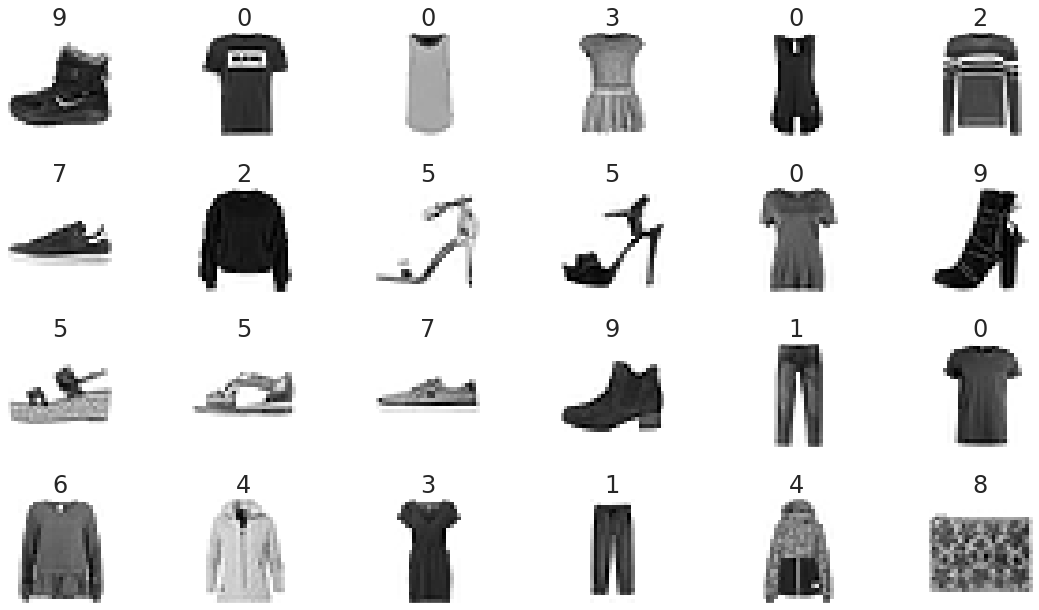

In [83]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [84]:
sns.set(font_scale=1)  

## 3 Data Preparation
### Reshaping the Image Data 

### Q1: Reshape the image data as displayed below.

In [85]:
### reshape x_train

# Your Code Starts here 

X_train = X_train.reshape((60000, 28, 28, 1))

# Your Code ends here

In [86]:
X_train.shape

(60000, 28, 28, 1)

In [87]:
### reshape x_test

# Your Code Starts here 

X_test = X_test.reshape((10000, 28, 28, 1))

# Your Code ends here

In [88]:
X_test.shape

(10000, 28, 28, 1)

### Normalizing the Image Data

### Q2: Normalixe x_train and x_test to be in the range 0 - 1

In [89]:
# Your Code Starts here 

X_train = X_train / 255.0
X_test = X_test / 255.0


# Your Code ends here

### One-Hot Encoding: Converting the Labels From Integers to Categorical Data

###Q3: Convert the Labels From Integers to Categorical Data

In [90]:
from tensorflow.keras.utils import to_categorical

In [91]:
## Your Code goes here

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Your Code ends here

In [92]:
y_train.shape

(60000, 10)

In [93]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [94]:
y_test.shape

(10000, 10)

## 4 Creating the Convolutional Neural Network

### Q4; Create the CNN Model using the following specifications.

In [95]:
'''
(i) Import the needed dependencies for creating a sequential model, adding 
Layers Conv2D, Dense, Flatten and Maxpooling to the Network
'''

'''
(ii) Initialize a Sequential Model call it CNN
'''

'''
(iii) Add the first Convolution Layer with 64 filters, 3x3 kernel, activation is 'ReLU'
'''

'''
(iv) Add a max pooling layer of size 2 x 2 to change dimensionality of the First
Convolution Layer’s Output to avoid overfitting
'''

'''
(v) Add another Convolutional Layer (double the filters as in layer 1, same kernel 
size and activation funciton Add Pooling Layer similar to the previous one
'''

'''
(vi) Change the resulting tensor to 1-D
'''

'''
(vii) Add a Dense Layer with 128 units with same activation function to reduce the 
Number of Features
'''

'''
(viii) Add a final Dense Layer to Produce the Final Results
'''

'''
(xi) Print the Model’s Summary
'''

## Your Code goes here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape

def define_model(kernel_size):

  CNN = Sequential()

  # first convolution layer
  # CONV 64 - 3 x 3 filters
  CNN.add(Conv2D(64, kernel_size = kernel_size,
                  activation='relu', input_shape=(28, 28, 1)))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # second convolution layer
  # CONV 128 - 3 x 3 filters
  CNN.add(Conv2D(128, kernel_size=kernel_size,
                  activation='relu'))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # # Reshape to 1d: Flatten
  CNN.add(Flatten())

  # Dense layer - 128 units
  CNN.add(Dense(128, activation='relu'))

  #output layer
  # Dense output Layer - 10 units
  CNN.add(Dense(10, activation='softmax'))

  CNN.summary()

  return CNN

## Your Code ends here


In [96]:
CNN = define_model((3, 3))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

### Q5: Visualize a Model’s Structure using plot_model, Image and store the convnet model into a '.png' file

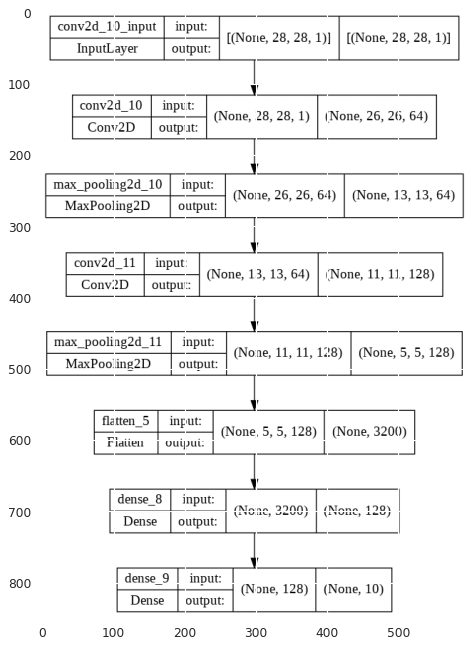

In [97]:
## Visualize a Model’s Structure using plot_model, Image and store the convnet model into a '.png' file

## Your Code goes here

from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg

plt.figure(figsize = (12, 10), dpi=80)
plot_model(CNN, to_file = 'cnn_model.png', show_shapes=True)
img = mpimg.imread('/content/cnn_model.png')
plt.imshow(img)
plt.show()

## Your Code ends here

### Q6: Compile, fit, and evaluate the model's accuracy

In [98]:
## Compile the model using 'adam' optimizer, loss function-categorical_crossentropy, metric - accuracy

## Your Code goes here

from tensorflow.keras.optimizers import Adam

# in next cell

## Your Code ends here

In [99]:
##Fit the model

## Your Code goes here

def executor(model_initializer, x_train, y_train, x_test, y_test):
  batch_size = 32
  num_classes = 10
  epochs = 6

  model = model_initializer
  opt = Adam(lr = 0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (x_test, y_test))

  return history

history = executor(CNN, X_train, y_train, X_test, y_test)

## Your Code ends here

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 126s 67ms/step - loss: 0.4240 - accuracy: 0.8464 - val_loss: 0.3257 - val_accuracy: 0.8841
Epoch 2/6
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2816 - accuracy: 0.8957 - val_loss: 0.2795 - val_accuracy: 0.8979
Epoch 3/6
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2338 - accuracy: 0.9137 - val_loss: 0.2656 - val_accuracy: 0.9024
Epoch 4/6
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2024 - accuracy: 0.9251 - val_loss: 0.2764 - val_accuracy: 0.8996
Epoch 5/6
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1727 - accuracy: 0.9353 - val_loss: 0.2579 - val_accuracy: 0.9076
Epoch 6/6
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1491 - accuracy: 0.9437 - val_loss: 0.2526 - val_accuracy: 0.9127


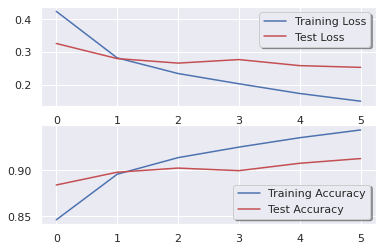

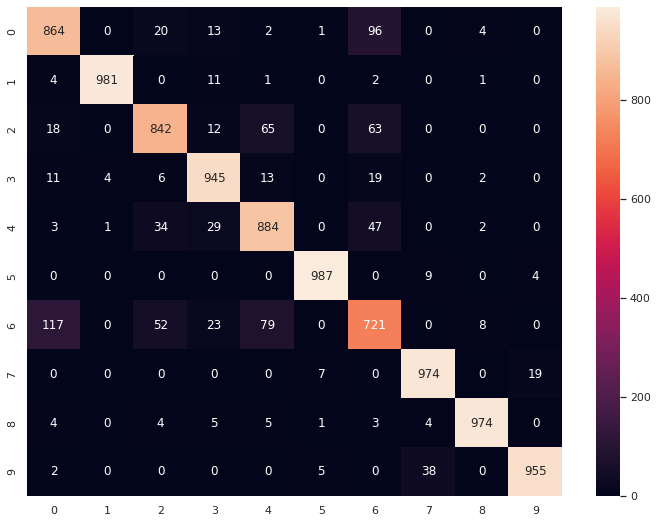

In [100]:
## Evaluate your model by displaying the loss and accuracy plot

## Your Code goes here
from tensorflow.math import confusion_matrix

def visualizer(history):
  fig, ax = plt.subplots(2,1)
  ax[0].plot(history.history['loss'], color='b', label="Training Loss")
  ax[0].plot(history.history['val_loss'], color='r', label="Test Loss")
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
  ax[1].plot(history.history['val_accuracy'], color='r', label="Test Accuracy")
  legend = ax[1].legend(loc='best', shadow=True)

  # Predict the values from the validation dataset
  y_pred = CNN.predict(X_test)
  # Convert predictions classes to one hot vectors 
  y_pred_classes = np.argmax(y_pred,axis = 1) 
  # Convert validation observations to one hot vectors
  y_true = np.argmax(y_test,axis = 1)
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(y_true, y_pred_classes)

  plt.figure(figsize=(12, 9))
  c = sns.heatmap(confusion_mtx, annot=True, fmt='g')

  return y_pred, y_pred_classes, y_true

predictions, y_pred_classes, y_true = visualizer(history)

## Your Code ends here


### Q7: Define a function to display the probabilities for given Incorrect Predictions, for instance, image 583

In [101]:
## Define a function to display the probabilities for given Incorrect Predictions

def display_probabilities(image_number):
  
## Your Code goes here

  true_class = y_true[image_number]
  incorrect_prob = 1 - predictions[image_number][true_class]
  print("Probability of incorrect prediction is {}".format(incorrect_prob))
  print("Classwise probability")
  for i,j in enumerate(predictions[image_number]):
    print("{}: {}".format(i,j))
  return incorrect_prob

## Your Code ends here

incorrect_prob = display_probabilities(583)

Probability of incorrect prediction is 0.00012087821960449219
Classwise probability
0: 2.809403820691614e-10
1: 1.9816859958554645e-11
2: 1.0306103886970064e-10
3: 7.33996891044697e-12
4: 7.060159679106448e-10
5: 1.7574245703144697e-06
6: 1.8444718408866523e-12
7: 0.00011913306661881506
8: 7.910401392079158e-13
9: 0.9998791217803955


### Q8: Find the number of incorrect predictions and visualize the incorrect predictions by displaying the image, its index, predicted, and expected labels 

In [102]:
## Locate(count) the Incorrect Predictions

## Your Code goes here

def return_indices_correlated_guess(a, b):
  return [i for i, v in enumerate(a) if v != b[i]]

wrong_predictions = return_indices_correlated_guess(y_pred_classes, y_true)

## Your Code ends here


(24, 28, 28, 1)
[ 183  905  361  511  702  352  664   68  881  979 1066  381  674  600
 1104  286  956   49  526  669  244  478   67  460]


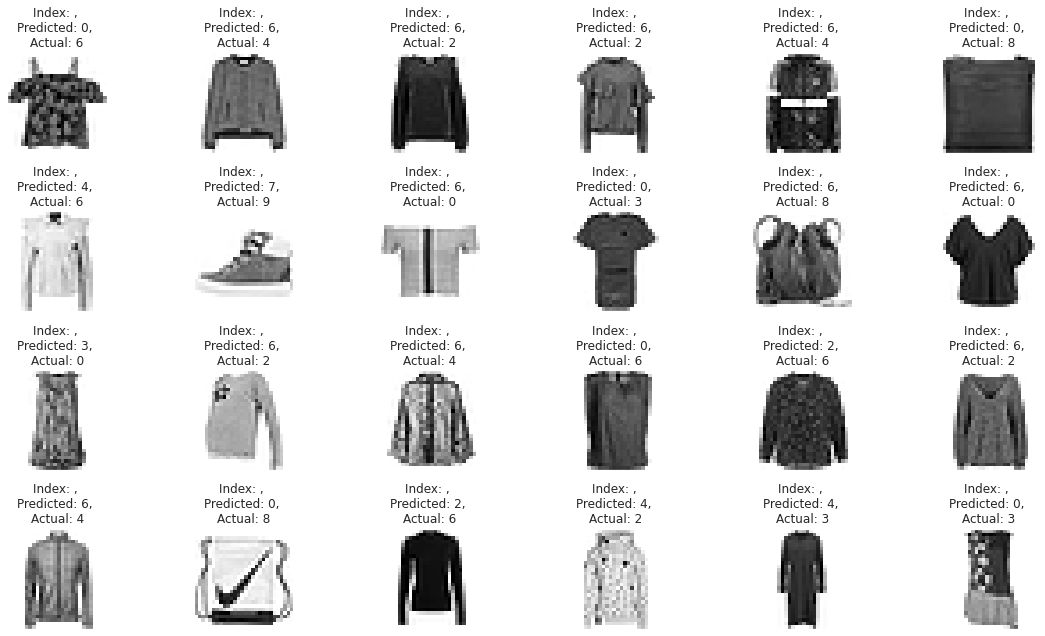

In [103]:
## Visualize Incorrect Predictions

## Your Code goes here

index = np.random.choice(wrong_predictions[:100], 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

print(X_test[index].shape)

print(index)

for item in zip(axes.ravel(), X_test[index].reshape((24, 28, 28)), y_true[index], y_pred_classes[index]):
    axes, image, actual, predicted = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title("Index: , \nPredicted: {}, \nActual: {}".format(predicted, actual))
plt.tight_layout()

## Your Code ends here

### Q9: Now, change the kernel size from 3 x 3 to 5 x 5. Reexecute the model and show how the prediction accuracy changes.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 169s 90ms/step - loss: 0.4314 - accuracy: 0.8424 - val_loss: 0.3344 - val_accuracy: 0.8788
Epoch 2/6
1875/1875 [==============================] - 166s 88ms/step - loss: 0.2851 - accuracy: 0.8949 - val_loss: 0.2849 - val_accuracy: 0.8930
Epoch 3/6
1875/1875 [==============================] - 164s 88ms/step - loss: 0.2394 - accuracy: 0.9114 - val_loss: 0.2781 - val_accuracy: 0.9004
Epoch 4/6
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2070 - accuracy: 0.9232 - val_loss: 0.2645 - val_accuracy: 0.9091
Epoch 5/6
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1805 - accuracy: 0.9325 - val_loss: 0.2697 - val_accuracy: 0.9034
Epoch 6/6
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1589 - accuracy: 0.9408 - val_loss: 0.2411 - val_accuracy: 0.9159


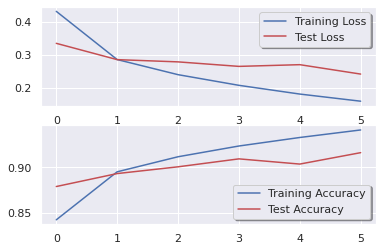

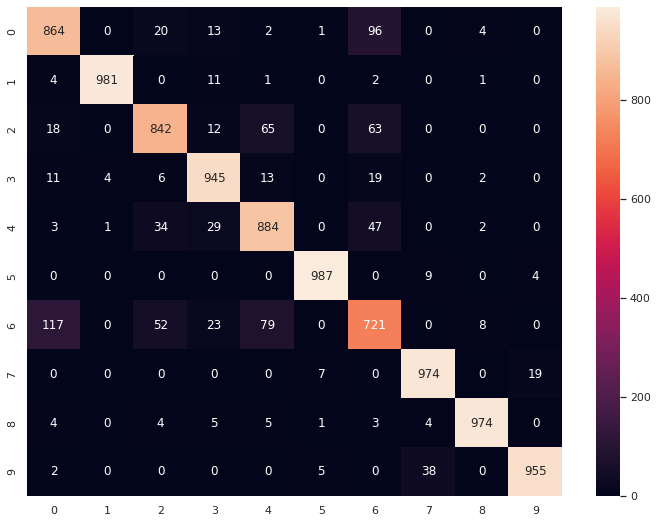

In [104]:
## Your Code goes here

CNN_5by5 = define_model((5, 5))
history_5by5 = executor(CNN_5by5, X_train, y_train, X_test, y_test)
predictions_5by5, y_pred_classes_5by5, y_true_5by5 = visualizer(history_5by5)

## Your Code ends here

####Q9 Observation:

Kernel size was increased from 3x3 to 5x5 to observe what sort of variations take place due to the aforementioned changed in the convolutional layers. One simple yet significant change due to the different kernel size is the increase in the number of parameters which might change the quality of results produced, however, that does come at the cost of increased execution times and requirement for more resources. This does seem to be the case when we observe the accuracy plots but it appears to be minor, one reason for which might be that we are only running 6 epochs and further epochs might produce more diverged results.

### Q10:Execute the model with the following changes. 
(i) Remove the first Dense Layer in the convnet model. How does it change the prediction accuracy? 

(ii) Replace the Dense layer that you removed. Keras prettrained convnets use Dense layers with 4096 neurons. Add such a layer before the TWO Dense Layers in the model. How does this change the prediction accuracy?

In [ ]:
## Your Code goes here


def define_model_v1(kernel_size):

  CNN = Sequential()

  # first convolution layer
  # CONV 64 - 3 x 3 filters
  CNN.add(Conv2D(64, kernel_size = kernel_size,
                  activation='relu', input_shape=(28, 28, 1)))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # second convolution layer
  # CONV 128 - 3 x 3 filters
  CNN.add(Conv2D(128, kernel_size=kernel_size,
                  activation='relu'))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # # Reshape to 1d: Flatten
  CNN.add(Flatten())

  # Dense layer - 128 units
  # CNN.add(Dense(128, activation='relu'))

  #output layer
  # Dense output Layer - 10 units
  CNN.add(Dense(10, activation='softmax'))

  CNN.summary()

  return CNN


CNN_v1 = define_model_v1((3, 3))
history_v1 = executor(CNN_v1, X_train, y_train, X_test, y_test)
predictions_v1, y_pred_classes_v1, y_true_v1 = visualizer(history_v1)

def define_model_v2(kernel_size):

  CNN = Sequential()

  # first convolution layer
  # CONV 64 - 3 x 3 filters
  CNN.add(Conv2D(64, kernel_size = kernel_size,
                  activation='relu', input_shape=(28, 28, 1)))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # second convolution layer
  # CONV 128 - 3 x 3 filters
  CNN.add(Conv2D(128, kernel_size=kernel_size,
                  activation='relu'))
  # MAXPOOLING 2 x 2
  CNN.add(MaxPooling2D(pool_size=(2, 2)))

  # # Reshape to 1d: Flatten
  CNN.add(Flatten())

  # Dense layer - 128 units
  CNN.add(Dense(4096, activation='relu'))

  # Dense layer - 128 units
  CNN.add(Dense(128, activation='relu'))

  #output layer
  # Dense output Layer - 10 units
  CNN.add(Dense(10, activation='softmax'))

  CNN.summary()

  return CNN


CNN_v2 = define_model_v2((3, 3))
history_v2 = executor(CNN_v2, X_train, y_train, X_test, y_test)
predictions_v2, y_pred_classes_v2, y_true_v2 = visualizer(history_v2)


## Your Code ends here

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3200)              0         
                                                                 
 dense_14 (Dense)            (None, 10)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/6
1875/1875 [==============================] - 130s 69ms/step - loss: 0.4477 - accuracy: 0.8394 - val_loss: 0.3509 - val_accuracy: 0.8724
Epoch 2/6
1875/1875 [==============================] - 129s 69ms/step - loss: 0.3064 - accuracy: 0.8882 - val_loss: 0.3112 - val_accuracy: 0.8858
Epoch 3/6
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2591 - accuracy: 0.9068 - val_loss: 0.2863 - val_accuracy: 0.8949
Epoch 4/6
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2297 - accuracy: 0.9166 - val_loss: 0.2863 - val_accuracy: 0.8925
Epoch 5/6
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2064 - accuracy: 0.9246 - val_loss: 0.2609 - val_accuracy: 0.9074
Epoch 6/6
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1873 - accuracy: 0.9311 - val_loss: 0.2701 - val_accuracy: 0.9037
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output

### Execution halted early for the last model with 4096 neurons layer. This was due to the higher parameters trained and thus epoch time was higher. Thus the model run was halted early. This should not be an issue otherwise. The plots were also not plotted due to the same. As just 1 epoch was run.

#### Q10: Observation

As we reduce one of the dense layer, the execution time reduced, however, the accuracy suffered a bit. 
Addition of a dense layer with 4096 layer, increased the execution time 3 folds. This comes with an increased accuracy with the same number of epochs. The enhanced learning is a result of the higher number of parameters that are trained. 

### END